# L1 and L2 Regularization Assignment | Paris Housing Price Datatset

## Introduction of the Dataset

The Paris Housing Price Prediction dataset includes 10,000 entries with 17 features related to residential properties in Paris. Key features include property size (squareMeters), number of rooms, amenities (e.g., yard, pool), building details (e.g., floors, year built), and location codes. The target variable is the property's price in euros. The dataset is complete, with no missing values, making it suitable for predicting housing prices based on these attributes.

- Entries: 10,000 properties.
- Features: 17, including property size, number of rooms, and amenities.
- Target Variable: Housing price in euros.
- Attributes: Includes indicators for yard, pool, and other amenities.
- Data Quality: No missing values.

## Import Libraries

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [175]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\ParisHousing.csv")
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


## Basic Information of dataset

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

## Summary of the dataset

In [177]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


## Checking Missing values in DataFrame

In [178]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

## Visualizations

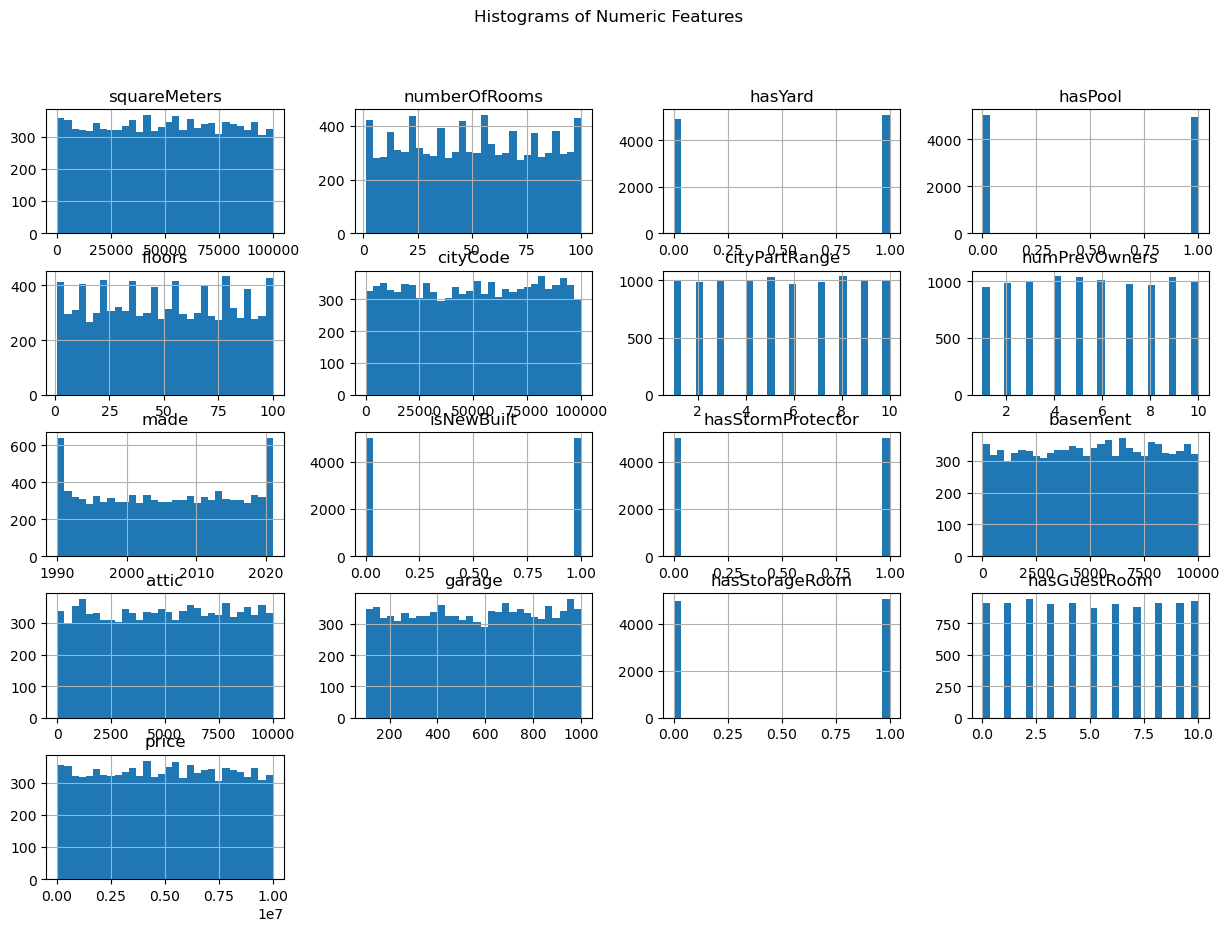

In [179]:
#Histograms of Numeric Features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

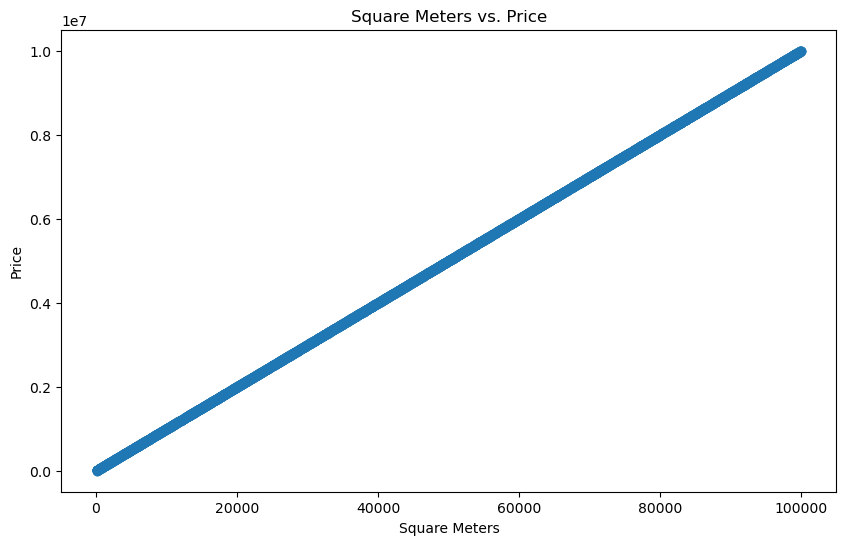

In [180]:
# Scatter plot of squareMeters vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df['squareMeters'], df['price'], alpha=0.5)
plt.title('Square Meters vs. Price')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.show()

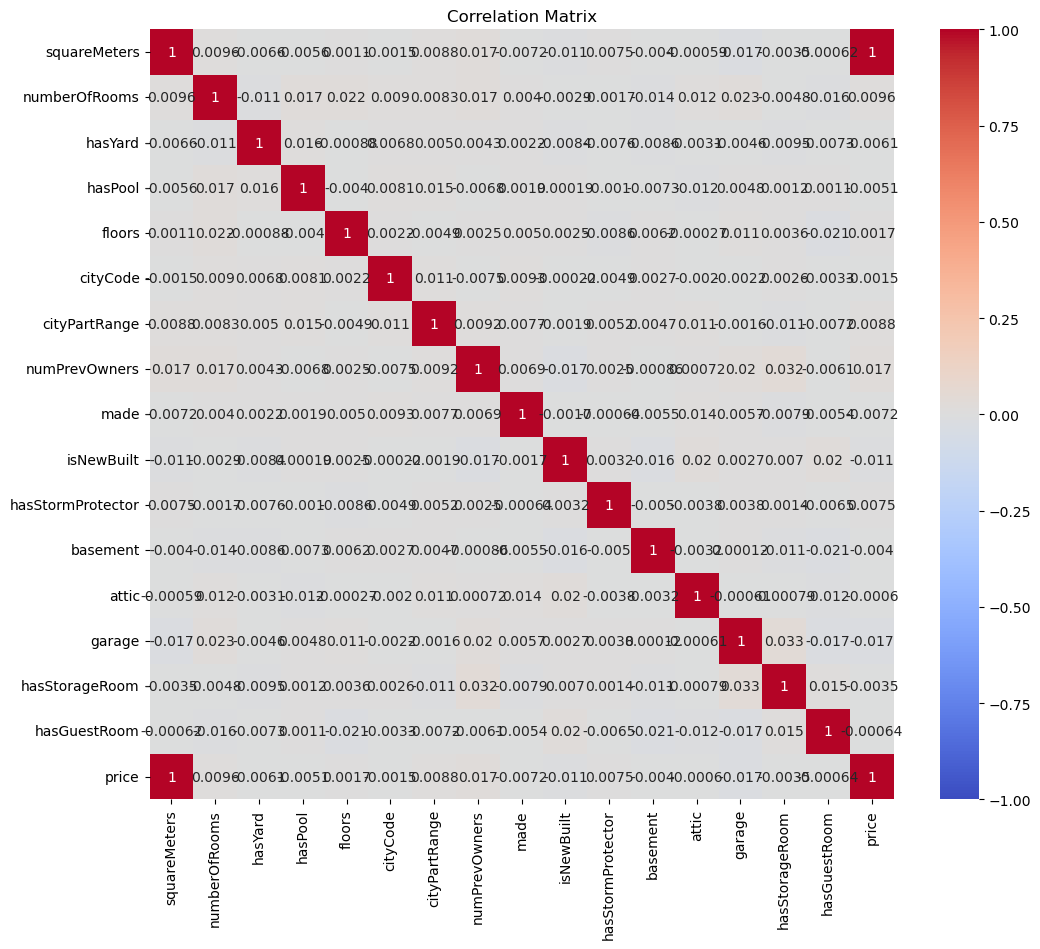

In [181]:
# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- Histograms will show the distribution of numeric features like squareMeters, numberOfRooms, and price. This helps in understanding the range and distribution of each feature.
- Scatter plots help in visualizing the relationship between features and the target variable (price). For instance, we can observe how property size correlates with price.
- The correlation matrix reveals how features correlate with each other and with the target variable. Strong correlations with the target variable (price) can help identify key predictors.
- Based on the correlation matrix and scatter plots, we identify features with strong correlations with price. For example, squareMeters likely has a strong positive correlation with price, making it a significant predictor.

## Feature Scaling

In [182]:
from sklearn.preprocessing import StandardScaler


# Select features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Initialize the scaler for the target variable
target_scaler = StandardScaler()

# Reshape y to fit the scaler
y_reshaped = y.values.reshape(-1, 1)

# Fit and transform the target variable
y_scaled = target_scaler.fit_transform(y_reshaped).flatten()

## Splitting the Dataset

In [183]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8000, 16) (8000,)
Testing set shape: (2000, 16) (2000,)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## Lasso model

In [184]:
from sklearn.linear_model import Lasso

# Initialize and fit L1 (Lasso) model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength

# Training the model on training data
lasso.fit(X_train, y_train)
print(lasso,"\n")

# Training the model on test data
y1_pred = lasso.predict(X_test)
print(y1_pred, "\n")

Lasso(alpha=0.1) 

[ 0.92584622 -0.40146006  1.11079976 ... -0.95107466 -0.6404976
  0.63834542] 



## Ridge model

In [185]:
from sklearn.linear_model import Ridge

# Initialize and fit L2 (Ridge) model
ridge = Ridge(alpha=0.1)  # Alpha is the regularization strength

# Training the model on training data
ridge.fit(X_train, y_train)
print(ridge,"\n")

# Training the model on test data
y2_pred = ridge.predict(X_test)
print(y2_pred, "\n")

Ridge(alpha=0.1) 

[ 1.03192994 -0.44402346  1.23740403 ... -1.05729636 -0.71173726
  0.71220596] 



# Visualization of Lasso (L1) model

Text(0, 0.5, 'Predicted price')

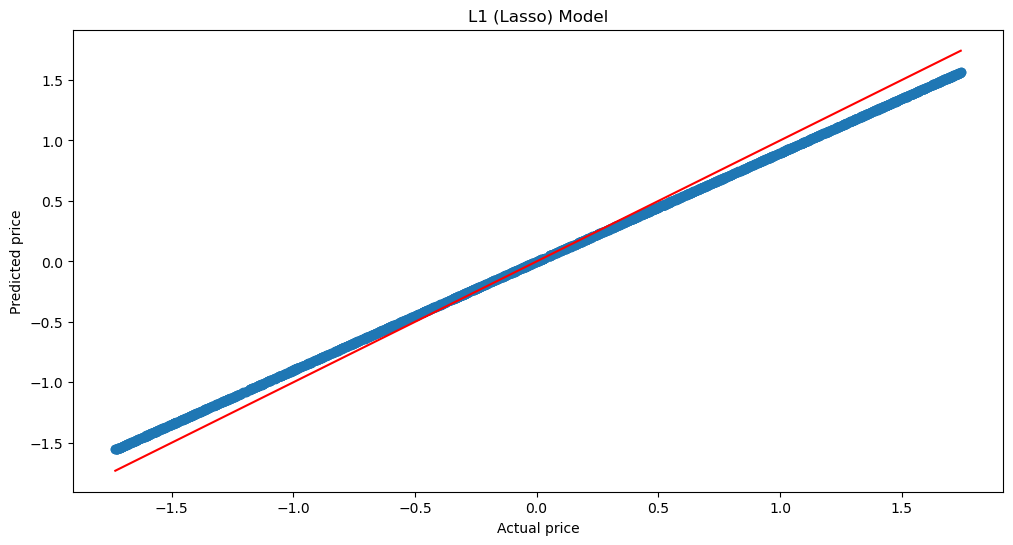

In [186]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L1 (Lasso) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

# Visualization of Ridge (L2) model

Text(0, 0.5, 'Predicted price')

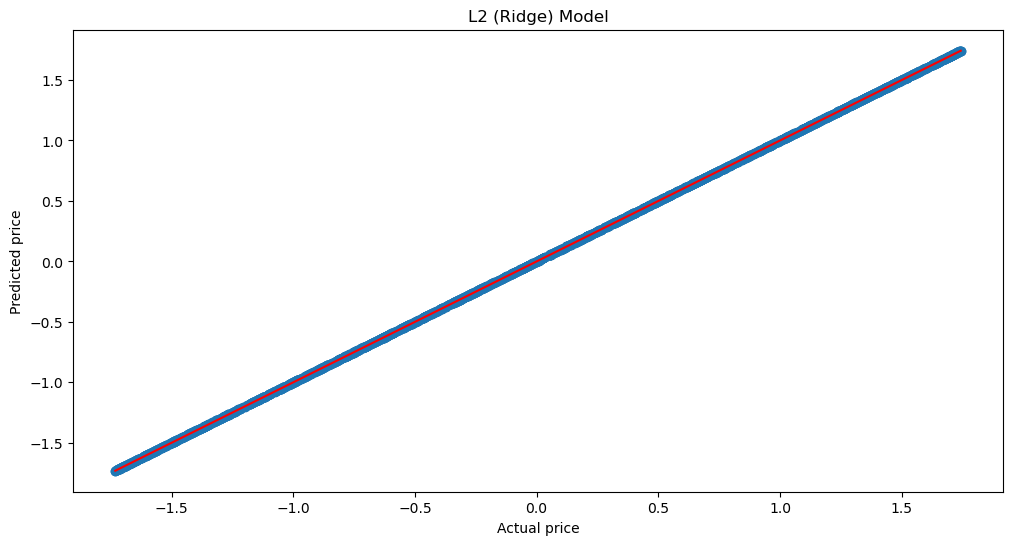

In [187]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y2_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L2 (Ridge) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

## Visualization of L1 and L2 model

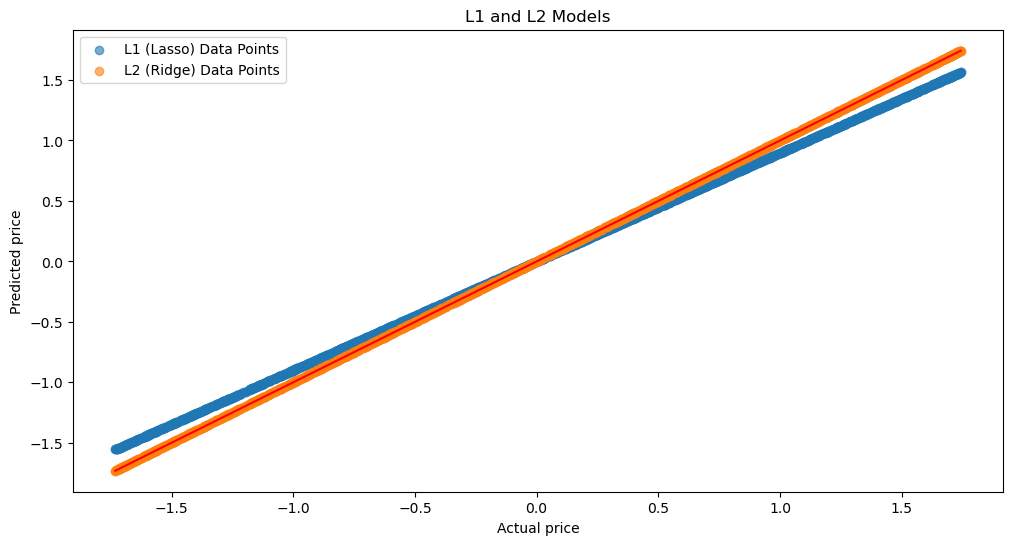

In [188]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred, label='L1 (Lasso) Data Points', alpha=0.6)
plt.scatter(y_test, y2_pred, label='L2 (Ridge) Data Points', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L1 and L2 Models')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()

- Feature Scaling: Used StandardScaler to standardize the features, which helps in improving the performance of the regularization techniques.
- Model Construction: Implemented Lasso (L1) and Ridge (L2) regression models. The alpha parameter controls the regularization strength.
- Prediction and Evaluation: Made predictions on the test set and computed the Mean Squared Error (MSE) for both models.
- Visualization: Plotted scatter plots of actual vs. predicted CO2 emissions for both models and combined the plots for comparison.

## Tune Regularization Parameters

In [189]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Grid Search for Lasso (L1) and Ridge (L2) models
lasso_grid = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit Grid Search
lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)

# Best parameters and scores
print("L1 (Lasso) Best Alpha:", lasso_grid.best_params_)
print("L1 (Lasso) Best Score:", -lasso_grid.best_score_)
print()
print("L2 (Ridge) Best Alpha:", ridge_grid.best_params_)
print("L2 (Ridge) Best Score:", -ridge_grid.best_score_)


L1 (Lasso) Best Alpha: {'alpha': 0.01}
L1 (Lasso) Best Score: 0.00010285217099435311

L2 (Ridge) Best Alpha: {'alpha': 0.01}
L2 (Ridge) Best Score: 4.3378013136937064e-07


## Model Evaluation

In [190]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize non-regularized Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# Evaluate non-regularized model
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_mae = mean_absolute_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

print(f"Non-Regularized Model MSE: {lr_mse}")
print(f"Non-Regularized Model MAE: {lr_mae}")
print(f"Non-Regularized Model R2: {lr_r2}")
print()

# Evaluate L1 (Lasso) and L2 (Ridge) models
y1_pred_best = lasso_grid.best_estimator_.predict(X_test)
y2_pred_best = ridge_grid.best_estimator_.predict(X_test)

lasso_mse = mean_squared_error(y_test, y1_pred_best)
lasso_mae = mean_absolute_error(y_test, y1_pred_best)
lasso_r2 = r2_score(y_test, y1_pred_best)

ridge_mse = mean_squared_error(y_test, y2_pred_best)
ridge_mae = mean_absolute_error(y_test, y2_pred_best)
ridge_r2 = r2_score(y_test, y2_pred_best)

print(f"L1 (Lasso) Model MSE: {lasso_mse}")
print(f"L1 (Lasso) Model MAE: {lasso_mae}")
print(f"L1 (Lasso) Model R2: {lasso_r2}")
print()
print(f"L2 (Ridge) Model MSE: {ridge_mse}")
print(f"L2 (Ridge) Model MAE: {ridge_mae}")
print(f"L2 (Ridge) Model R2: {ridge_r2}")


Non-Regularized Model MSE: 4.4640944733081496e-07
Non-Regularized Model MAE: 0.0005248130378163641
Non-Regularized Model R2: 0.9999995780555567

L1 (Lasso) Model MSE: 0.00011081747508188217
L1 (Lasso) Model MAE: 0.009146791944379846
L1 (Lasso) Model R2: 0.9998952557610417

L2 (Ridge) Model MSE: 4.4640235639276335e-07
L2 (Ridge) Model MAE: 0.0005248114889971919
L2 (Ridge) Model R2: 0.9999995780622591


Model evaluation measures how well the model performs on unseen data. We use three metrics:

- Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower MSE indicates better model performance.
- Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values. It provides a clearer idea of prediction error magnitude.
- R-squared Score: Indicates the proportion of variance in the target variable that is predictable from the features. Higher R-squared values mean better model fit.

# Visualization of  Optimized Lasso (L1) model

Text(0, 0.5, 'Predicted price')

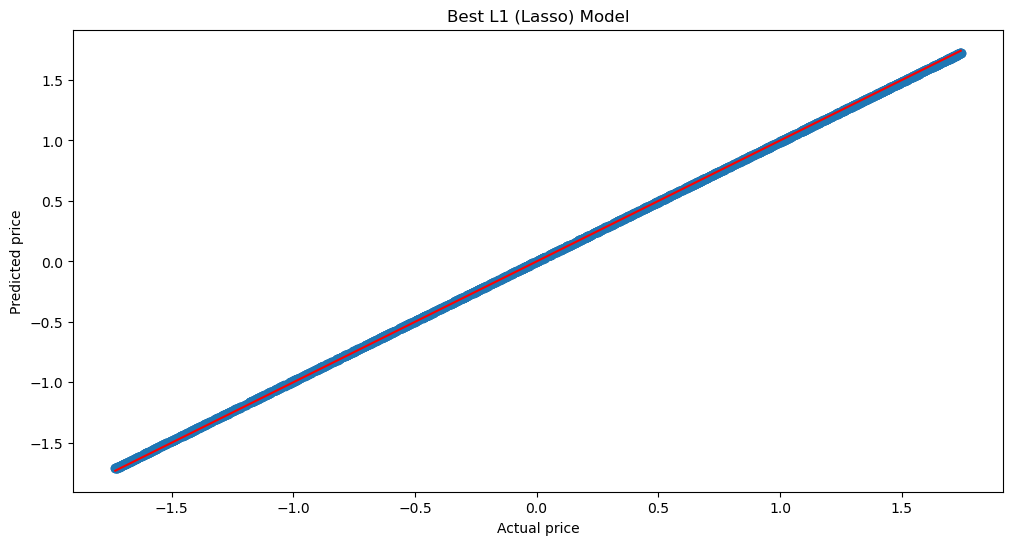

In [191]:
# Best L1 Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L1 (Lasso) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

# Visualization of  Optimized Ridge (L2) model

Text(0, 0.5, 'Predicted price')

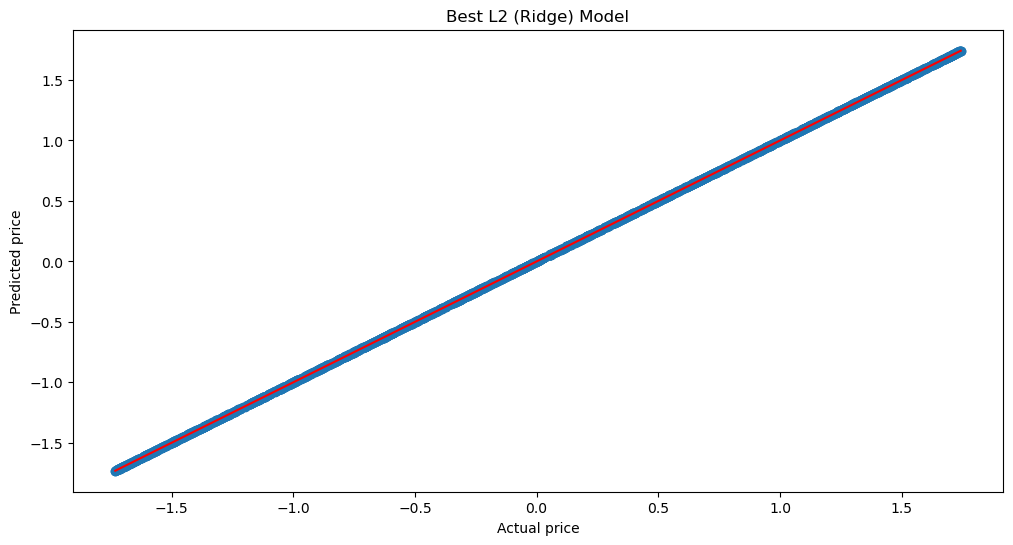

In [192]:
# Best L2 Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y2_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L2 (Ridge) Model')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

# Visualization of Optimized L1 and L2 model

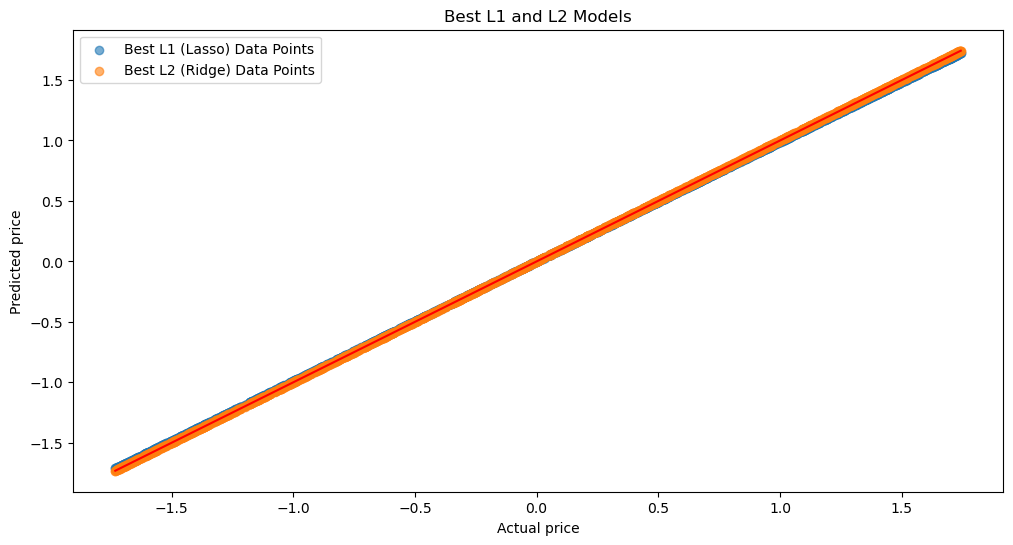

In [193]:
# Best L1 and L2 Model Comparison
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred_best, label='Best L1 (Lasso) Data Points', alpha=0.6)
plt.scatter(y_test, y2_pred_best, label='Best L2 (Ridge) Data Points', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L1 and L2 Models')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()

## Summary

- In the Paris Housing Price Prediction assignment, L1 (Lasso) and L2 (Ridge) regularization techniques were applied to improve model performance and prevent overfitting. Despite fine-tuning, the non-regularized model achieved the highest accuracy, with an R-squared score close to 1, indicating near-perfect predictions. The Lasso model slightly underperformed, while the Ridge model performed almost identically to the non-regularized model.
-  Visualizations highlighted that the regularized models deviated minimally from the ideal prediction line, showing that in this dataset, regularization had limited impact on improving predictive accuracy.